In [ ]:
import torch.nn as nn
import pandas as pd
import torch
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
torch.cuda.is_available()

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.Loading and Preparing for Data

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/LAB AI/Jupyter Notebook/mnist_train.csv.zip")
valid_df = pd.read_csv("/content/drive/MyDrive/LAB AI/Jupyter Notebook/mnist_test.csv.zip")

In [ ]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
valid_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sample_df = train_df.head().copy()
sample_df.pop("label")
sample_x = sample_df.values
sample_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
sample_x.shape

(5, 784)

In [ ]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
IMG_CHANNELS = 1

sample_x = sample_x.reshape(-1,IMG_CHANNELS,IMG_HEIGHT,IMG_WIDTH)
sample_x

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         .

##2.Create a Dataset

In [ ]:
class MyDataset(Dataset):
  def __init__(self,base_df):
    x_df = base_df.copy()
    y_df = x_df.pop("label")
    x_df = x_df.values/255
    x_df = x_df.reshape(-1,IMG_CHANNELS,IMG_HEIGHT,IMG_WIDTH)
    self.xs = torch.tensor(x_df).float().to(device)
    self.ys = torch.tensor(y_df).to(device)

  def __getitem__(self,idx):
    x = self.xs[idx]
    y = self.ys[idx]
    return x, y
  def __len__(self):
    return len(self.xs)

##3.Create a DataLoader

In [ ]:
BATCH_SIZE = 32
train_data = MyDataset(train_df)
train_loader = DataLoader(train_data,batch_size = BATCH_SIZE,shuffle = True)
train_N = len(train_loader.dataset)

valid_data = MyDataset(valid_df)
valid_loader = DataLoader(valid_data,batch_size = BATCH_SIZE,shuffle = False)
valid_N = len(valid_loader.dataset)


In [ ]:
batch = next(iter(train_N))
batch

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
batch[0].shape

torch.Size([32, 1, 28, 28])

In [ ]:
batch[1].shape

torch.Size([32])

##4.Creating a Convolutional Model

Saving cnn.png to cnn.png


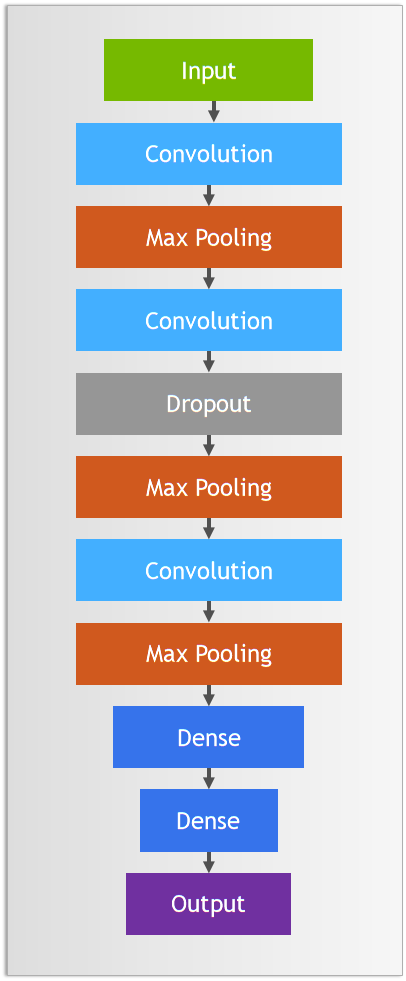

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image("cnn.png")

In [ ]:
n_classes = 24
kernel_size = 3
flattened_img_size = 75*3*3

model = nn.Sequential(
    #First Convolution
    nn.Conv2d(IMG_CHANNELS,25,kernel_size,stride = 1,padding = 1), #25*28*28
    nn.BatchNorm2d(25),
    nn.ReLU(),
    nn.MaxPool2d(2,stride = 2), #25*14*14

    #Second Convolution
    nn.Conv2d(25,50,kernel_size,stride = 1,padding = 1), #50*14*14
    nn.BatchNorm2d(50),
    nn.ReLU(),
    nn.MaxPool2d(2,stride = 2), #50*7*7

    #Third Convolution
    nn.Conv2d(50,75,kernel_size,stride = 1, padding = 1), #75*7*7
    nn.BatchNorm2d(75),
    nn.ReLU(),
    nn.MaxPool2d(2,stride = 2), #75*3*3

    #Flatten to Dense
    nn.Flatten(),
    nn.Linear(flattened_img_size,512),
    nn.Dropout(.3),
    nn.ReLU(),
    nn.Linear(512,n_classes),
)

##5.Summarizing the Model

In [ ]:
model = torch.compile(model.to(device))
model

OptimizedModule(
  (_orig_mod): Sequential(
    (0): Conv2d(1, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(25, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(50, 75, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=675, out_features=512, bias=True)
    (14): Dropout(p=0.3, inplace=False)
    (15): ReLU()


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())


In [ ]:
def get_batch_accuracy(output,y,N):
  pred = output.argmax(dim = 1, keepdim = True)
  correct = pred.eq(y.view_as(pred)).sum().item()
  return correct/N

##6.Training the Model

In [ ]:
def train():
  loss = 0
  accuracy = 0

  model.train() #Đặt mô hình vào chế độ huấn luyện
  for x, y in train_loader: # Lặp qua từng batch dữ liệu trong train_loader(x:input, y: label)
    output = model(x)  # Dự đoán đầu ra bằng mô hình
    optimizer.zero_grad() # Đặt lại gradient trước khi tính toán mới
    batch_loss = loss_function(output,y) # Tính toán hàm mất mát cho batch hiện tại
    batch_loss.backward() # Tính toán gradient của hàm mất mát
    optimizer.step() # Cập nhật trọng số của mô hình

    loss += batch_loss.item() # Cộng dồn giá trị mất mát
    accuracy += get_batch_accuracy(output,y,train_N) # Cộng dồn độ chính xác của batch
  print("Train - Loss: {:.4f} Accuracy: {:.4f}".format(loss,accuracy))


In [ ]:
def validate():
  loss = 0
  accuracy = 0

  model.eval() # Đặt mô hình vào chế độ đánh giá
  with torch.no_grad(): #Tắt tính toán gradient
    for x, y in valid_loader: # Lặp qua từng batch dữ liệu trong valid_loader
      output = model(x) # Dự đoán đầu ra bằng mô hình
      loss += loss_function(output,y).item() # Tính toán và cộng dồn giá trị mất mát
      accuracy += get_batch_accuracy(output,y,valid_N) # Cộng dồn độ chính xác của b
  print("Valid - Loss: {:.4f} Accuracy: {:.4f}".format(loss, accuracy))

In [ ]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True
epochs = 10
for epoch in range(epochs):
  print("Epoch: {}".format(epoch))
  train()
  validate()

Epoch: 0
Train - Loss: 7.9491 Accuracy: 0.9990
Valid - Loss: 13.1216 Accuracy: 0.9926
Epoch: 1
Train - Loss: 7.8281 Accuracy: 0.9988
Valid - Loss: 13.7577 Accuracy: 0.9931
Epoch: 2
Train - Loss: 9.6861 Accuracy: 0.9986
Valid - Loss: 13.4800 Accuracy: 0.9930
Epoch: 3
Train - Loss: 6.8079 Accuracy: 0.9991
Valid - Loss: 14.8867 Accuracy: 0.9932
Epoch: 4
Train - Loss: 9.3391 Accuracy: 0.9985
Valid - Loss: 15.7451 Accuracy: 0.9929
Epoch: 5
Train - Loss: 7.5344 Accuracy: 0.9989
Valid - Loss: 16.7548 Accuracy: 0.9923
Epoch: 6
Train - Loss: 7.4045 Accuracy: 0.9987
Valid - Loss: 15.4643 Accuracy: 0.9935
Epoch: 7
Train - Loss: 5.2461 Accuracy: 0.9993
Valid - Loss: 17.6504 Accuracy: 0.9932
Epoch: 8
Train - Loss: 7.9050 Accuracy: 0.9990
Valid - Loss: 19.5023 Accuracy: 0.9917
Epoch: 9
Train - Loss: 8.4985 Accuracy: 0.9988
Valid - Loss: 16.9979 Accuracy: 0.9926
